# <h1><center>Equidade em Aprendizado de Máquina</center></h1>

## Renan Del Buono Brotto

## Introdução

As técnicas de Aprendizado de Máquina estão em rápida ascensão em diversas áreas, como processamento de linguagem natural  e reconhecimento de fala \cite{Kamath2019}, processamento de imagem \cite{Cipolla2013}, problemas de classificação \cite{Duda2000}, reconhecimento de padrões \cite{Bishop2006} entre outras. 

O objetivo central do Aprendizado de Máquina é projetar modelos computacionais capazes de aprender uma determinada tarefa a partir de dados, sem que exista uma programação específica para a tarefa em questão \cite{Samuel1959}. Para tanto, apresentamos um conjunto de dados disponíveis, denominado conjunto de treinamento, a fim de que o modelo capture as informações relevantes para o problema investigado \cite{Hastie2009}. 

Além de ter um bom desempenho, segundo uma métrica adequada, frente aos dados de treinamento, o modelo ajustado deve ser capaz de apresentar um bom desempenho frente a dados desconhecidos, pertencentes a um conjunto normalmente denominado conjunto de teste. Este segundo requisito configura a capacidade de generalização do modelo \cite{Bishop2006}, \cite{haykin-rn}.

Contudo, durante o processo de aprendizagem, o modelo pode capturar informações irrelevantes, ou mesmo indesejadas, para a tarefa considerada, configurando uma situação de sobreajuste \cite{haykin-rn}. Neste tipo de situação, temos um bom desempenho frente ao conjunto de treinamento, mas o modelo se comporta mal quando avaliado frente a novos dados \cite{Bishop2006}. Dentre as informações indesejadas aprendidas, podemos citar ruído presente sobre os dados \cite{Bishop2006} ou mesmo algum tipo de viés apresentado nos dados de treinamento.

O viés contido nos dados de treinamento desempenha um papel fundamental quando aplicamos os modelos de Aprendizado de Máquina em tarefas com impacto social direto, tais como concessão de crédito \cite{ONeil2016}., aprovação em universidades \cite{ONeil2016} ou a concessão de liberdade condicional \cite{Chouldechova2017}. Neste tipo de problema as técnicas clássicas de aprendizado incorporam as tendências observadas nos dados, o que pode dar origem a atributos discriminativos, como por exemplo o gênero em um problema de concessão de crédito ou a etnia em um problema de concessão de liberdade condicional. Uma vez aprendida esta característica, o modelo ajustado passa a produzir resultados que podem contribuir ainda mais com a disparidade do problema \cite{ONeil2016}.




## Objetivo

Nosso objetivo neste trabalho é aplicar as técnicas de ICA \cite{Hyvarinen2001} sobre os atributos do nosso problema de modo a promover a equidade na classificação. Para tanto, vamos investigar a descorrelação linear, tendo como base o trabalho \cite{Zafar2017}, e a descorrelação não-linear, que é uma condição mais próxima da independência.

Na sequência, descreveremos o _dataset_ que usaremos.

## Descrição do Dataset


Neste trabalho, usaremos o Adult Data Set (Disponível em: http://archive.ics.uci.edu/ml/datasets/adult e de domínio público). Este conjunto de dados é formado por 14 atributos, tanto categóricos quanto atributos numéricos, anonimizado. Dentre estes atributos temos idade, tipo de trabalho, gênero, etnia, estado civil, horas trabalhadas por semana entre outros. Para cada indivíduo do conjunto de dados, temos um rótulo, indicando uma renda anual superior (igual) a $50 k ou inferior a este limiar.

Como muitos dos atribuitos são categóricos, vamos convertê-los para atributos numéricos.


In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
import sklearn as sk
import seaborn as sns
import math
import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
def add_header(header, file, output_name):
    #function to add a header to a csv file
    import csv
    
    with open(file, 'rt') as input_file:
        reader = csv.reader(input_file)
        data_list = list(reader)
    
    with open(output_name, 'wt', newline ='') as output_file:
        writer = csv.writer(output_file, delimiter=',')
        writer.writerow(i for i in header)
        for j in data_list:
            writer.writerow(j)      

In [3]:
# Adicionando cabecalho aos dados

header = ["Age", "Workclass", "Fnlwgt", "Education", "Education-num", "Marital Status", "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss", "Hours per Week", "Native Country", "Annual Gain"]
file = "../data/adult-data.csv"
output_name = "../data/adultdataset.csv"
add_header(header, file, output_name)

In [4]:
#Abrindo o conjunto de dados
adult_data = pd.read_csv("../data/adultdataset.csv", sep=',')

#Selecao de atributos
adult_data = adult_data.drop(columns=['Fnlwgt'])


In [5]:
# Conversão dos atributos categóricos em atributos numéricos
le = preprocessing.LabelEncoder()
le.fit(adult_data['Annual Gain'])
le.classes_
adult_data['Annual Gain'] = le.transform(adult_data['Annual Gain'])

le = preprocessing.LabelEncoder()
le.fit(adult_data['Workclass'])
le.classes_
adult_data['Workclass'] = le.transform(adult_data['Workclass'])
adult_data.head(10)

le = preprocessing.LabelEncoder()
le.fit(adult_data['Education'])
le.classes_
adult_data['Education'] = le.transform(adult_data['Education'])

le = preprocessing.LabelEncoder()
le.fit(adult_data['Marital Status'])
le.classes_
adult_data['Marital Status'] = le.transform(adult_data['Marital Status'])

le = preprocessing.LabelEncoder()
le.fit(adult_data['Occupation'])
le.classes_
adult_data['Occupation'] = le.transform(adult_data['Occupation'])

le = preprocessing.LabelEncoder()
le.fit(adult_data['Relationship'])
le.classes_
adult_data['Relationship'] = le.transform(adult_data['Relationship'])

le = preprocessing.LabelEncoder()
le.fit(adult_data['Race'])
le.classes_
adult_data['Race'] = le.transform(adult_data['Race'])

le = preprocessing.LabelEncoder()
le.fit(adult_data['Sex'])
le.classes_
adult_data['Sex'] = le.transform(adult_data['Sex'])

le = preprocessing.LabelEncoder()
le.fit(adult_data['Native Country'])
le.classes_
adult_data['Native Country'] = le.transform(adult_data['Native Country'])



Para melhor entendermos a inequidade presente nos dados, vamos comparar, na sequência, o percentual de indivíduos com alta renda na população completa, na população masculina e na população feminina.

### População Completa

Vamos agora, visualizar um pouco os dados. Inicialmente, vamos analisar a proporção de indivíduos com alta renda (>= 50K) na população completa.

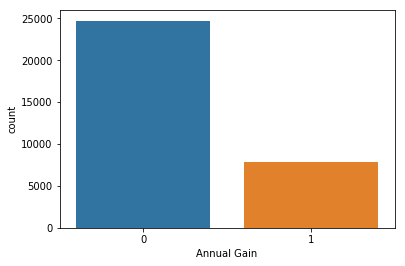

In [6]:
sns.countplot(adult_data['Annual Gain'])

adult_1 = sum(adult_data['Annual Gain']==1)

adult_0 = sum(adult_data['Annual Gain']==0)

ratio = adult_1/(adult_0 + adult_1)
#print('Percentual de alta renda (populacao completa): \n', ratio*100, '%')

Vamos agora repetir a mesma análise entre as populações masculina e feminina.
### Análise das Populações Masculina e Feminina

In [7]:
# Populacao Feminina
is_female = adult_data.Sex == 0
is_female.head()
female_data = adult_data[is_female]


In [8]:
#Populacao Masculina
is_male = adult_data.Sex == 1
is_male.head()
male_data = adult_data[is_male]


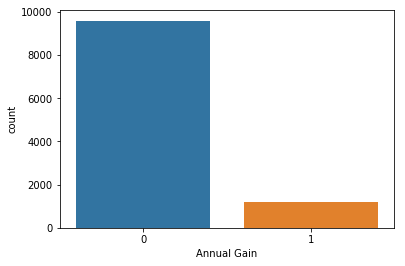

In [9]:
sns.countplot(female_data['Annual Gain'])

In [10]:
female_1 = sum(female_data['Annual Gain']==1)

female_0 = sum(female_data['Annual Gain']==0)

female_ratio_high = female_1/(female_0 + female_1)
#print('Percentual de alta renda (populacao feminina): \n', female_ratio_high*100, '%')

Percebemos do resultado acima que o número de indivíduos na população feminina na classe "Alta Renda" é inferior ao percentual da população como um todo.

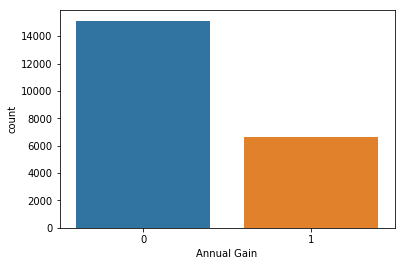

In [11]:
sns.countplot(male_data['Annual Gain'])

In [12]:
male_1 = sum(male_data['Annual Gain']==1)

male_0 = sum(male_data['Annual Gain']==0)

male_ratio_high = male_1/(male_0 + male_1)
#print('Percentual de alta renda (populacao masculina): \n', male_ratio_high*100, '%')


saida_percentual_pop = np.array([['','Geral','Masculino', 'Feminino'],
                ['Alta Renda [%]', 100*ratio, 100*male_ratio_high, 100*female_ratio_high],])

percentual_formatado = pd.DataFrame(data=saida_percentual_pop[1:,1:], index=saida_percentual_pop[1:,0], columns=saida_percentual_pop[0,1:])

percentual_formatado

,Geral,Masculino,Feminino
Alta Renda [%],24.080955744602438,30.573657641119777,10.946058861758425


O que notamos do resultado acima é uma inequidade entre indivíduos rotulados como "Alta Renda" nas populações masculina e feminina. Treinar um classificador da maneira tradicional, sem nenhum tratamento sobre os dados, fará com que o modelo de Aprendizado de Máquina incorpore as tendências observadas nos dados, o que pode contribuir com a acentuação da inequidade observada.

Na sequência do texto, apresentamos a nossa proposta para promover a equidade na classificação.

# Metodologia 

Para a tarefa de classificação, empregaremos um classificador ajustado segundo o paradigma de regressão logística. Para os nossos propósitos aqui, adotaremos o atributo "Gênero (_Sex_)" como atributo discriminatório. Ao todo, empregaremos 3 classificadores:

1) Classificador Tradicional: neste caso, faremos o treinamento sem nenhum tipo de ajuste sobre os dados.

2) Classificador com Descorrelação Linear: neste segundo caso, buscaremos descorrelacionar linearmente o atributo discriminatório das classes do problema ("Fairness Constraints: Mechanisms for Fair Classification", Zafar, _et al._, 2017).

3) Classificador com Descorrelação Não Linear: neste último caso, buscaremos a independência entre o atributo Gênero e as classe do problema, por meio da descorrelação não-linear.

Apresentamos com maior detalhe o nosso _Workflow_ no diagrama a seguir:


# Workflow


![Workflow](../fig/WorkflowIA369.png)

## Resultados

Nesta seção, apresentamos nossos resultados na tarefa de classificação em termos de acurácia e equilíbrio entre os indivíduos classificados como "Alta Renda" nas populações masculina e feminina.


In [13]:
dados_entrada = adult_data.values #converte dataframe para np array

#Separacao dos dados em treinamento e teste
percentual_teste = 0.3;
fim_treinamento = math.floor((1-percentual_teste)*dados_entrada.shape[0]);

dados_treino = dados_entrada[0:fim_treinamento+1, :];
dados_teste = dados_entrada[fim_treinamento+1:dados_entrada.shape[0], :]

entrada_treino = dados_treino[:, 0:dados_treino.shape[1]-1];
saida_treino = dados_treino[:, dados_treino.shape[1]-1];
saida_treino = np.reshape(saida_treino, (saida_treino.shape[0],1))

entrada_teste = dados_teste[:, 0:dados_teste.shape[1]-1];

saida_teste = dados_teste[:, dados_teste.shape[1]-1];
saida_teste = np.reshape(saida_teste, (saida_teste.shape[0],1))

#### Classificador 1

In [14]:
MC = 100 #simulacoes de Monte Carlo

acuracia_clf1 = 0;

for i in range(0, MC):
    #Classificador 1
    clf1 = SGDClassifier(max_iter=1000, tol=1e-2)
    clf1.fit(entrada_treino, saida_treino)

    saida_pred_1 = clf1.predict(entrada_teste)
    saida_pred_1 = np.reshape(saida_pred_1, (saida_pred_1.shape[0],1))

    acuracia_clf1 = acuracia_clf1 + metrics.accuracy_score(saida_teste, saida_pred_1)

#print('Acurácia Classificador 1 [%]: ', 100*acuracia_clf1/MC)

#### Classificador 2

In [15]:
#Classificador 2
#Descorrelacao Linear via PCA

entrada_treino_clf2 = np.copy(entrada_treino);
aux = entrada_treino_clf2[:,8]
aux = np.reshape(aux, (aux.shape[0],1))
genero_modificado_treino = np.concatenate((aux, saida_treino), axis=1);
pca = PCA(n_components=1);
genero_modificado_treino = pca.fit_transform(genero_modificado_treino)
entrada_treino_clf2[:,8] = genero_modificado_treino[:,0];

entrada_teste_clf2 = np.copy(entrada_teste);
aux = entrada_teste_clf2[:,8]
aux = np.reshape(aux, (aux.shape[0],1))
genero_modificado_teste = np.concatenate((aux, saida_teste), axis=1);
pca = PCA(n_components=1);
genero_modificado_teste = pca.fit_transform(genero_modificado_teste)
entrada_teste_clf2[:,8] = genero_modificado_teste[:,0];

acuracia_clf2=0;

for i in range(0, MC):

    clf2 = SGDClassifier(max_iter=1000, tol=1e-2)
    clf2.fit(entrada_treino_clf2, saida_treino)

    saida_pred_2 = clf2.predict(entrada_teste_clf2)
    saida_pred_2 = np.reshape(saida_pred_2, (saida_pred_2.shape[0],1))

    acuracia_clf2 = acuracia_clf2 + metrics.accuracy_score(saida_teste, saida_pred_2)

#print('Acurácia Classificador 2 [%]: ', 100*acuracia_clf2/MC)


#### Classificador 3

In [16]:
#Classificador 3
#Independencia via PCA Não Linear

entrada_treino_clf3 = np.copy(entrada_treino);
aux = np.tanh(entrada_treino_clf3[:,8]) #funcao de nao linearidade
aux = np.reshape(aux, (aux.shape[0],1))
genero_modificado_treino = np.concatenate((aux, saida_treino), axis=1);
pca = PCA(n_components=1);
genero_modificado_treino = pca.fit_transform(genero_modificado_treino)
entrada_treino_clf3[:,8] = genero_modificado_treino[:,0];

entrada_teste_clf3 = np.copy(entrada_teste);
aux = np.tanh(entrada_teste_clf2[:,8])
aux = np.reshape(aux, (aux.shape[0],1))
genero_modificado_teste = np.concatenate((aux, saida_teste), axis=1);
pca = PCA(n_components=1);
genero_modificado_teste = pca.fit_transform(genero_modificado_teste)
entrada_teste_clf3[:,8] = genero_modificado_teste[:,0];

acuracia_clf3=0

for i in range(0, MC):

    clf3 = SGDClassifier(max_iter=1000, tol=1e-2)
    clf3.fit(entrada_treino_clf2, saida_treino)

    saida_pred_3 = clf3.predict(entrada_teste_clf3)
    saida_pred_3 = np.reshape(saida_pred_3, (saida_pred_3.shape[0],1))

    acuracia_clf3 = metrics.accuracy_score(saida_teste, saida_pred_3)

#print('Acurácia Classificador 3 [%]: ', 100*acuracia_clf3/MC)


In [17]:
# Geracao da saida

saida_acuracia = np.array([['','Classificador 1','Classificador 2', 'Classificador 3'],
                ['Acurácia [%]',acuracia_clf1,acuracia_clf2, acuracia_clf3]])

acuracia_formatada = pd.DataFrame(data=saida_acuracia[1:,1:], index=saida_acuracia[1:,0], columns=saida_acuracia[0,1:])
acuracia_formatada

,Classificador 1,Classificador 2,Classificador 3
Acurácia [%],76.81449631449631,76.86179361179362,0.7484643734643734


Do resultado acima, notamos uma pequena perda de desempenho do Classificador 2 para o Classificador 1, em termos de acurácia. Este tipo de perda já é esperado, uma vez que ao reduzirmos a influência do atributo discriminatório sobre as classes do problema, eliminamos parte da informação de que o classificador necessita.

Esta perda de informação é muito mais acentuada no Classificador 3. Como aplicamos a descorrelação não-linear, eliminamos de modo mais acentuado a influência do atributo discriminatório sobre as classes do problema, quando comparado com a redução provida pela descorrelação linear.

Na sequência, vamos avaliar como cada um dos classificadores atua na promoção da equiadade. Para isso, avaliamos o percentual de indivíduos classificados como "Alta Renda" em cada uma das subpopulações de interesse.

In [18]:
#Calculo das taxas em cada uma das subpopulacoes

indice_masc = entrada_teste[:,8]==1
indice_fem = entrada_teste[:,8]==0

saida_pred_1_masc = saida_pred_1[indice_masc]
saida_pred_1_fem = saida_pred_1[indice_fem]
tam_populacao = saida_pred_1.shape[0]
total_masc_1 = sum(saida_pred_1_masc)
total_fem_1 = sum(saida_pred_1_fem)
taxa_masc_cl1 = total_masc_1/tam_populacao
taxa_masc_cl1 = 100*taxa_masc_cl1[0]
taxa_fem_cl1 = total_fem_1/tam_populacao
taxa_fem_cl1 = 100*taxa_fem_cl1[0]

saida_pred_2_masc = saida_pred_2[indice_masc]
saida_pred_2_fem = saida_pred_2[indice_fem]
total_masc_2 = sum(saida_pred_2_masc)
total_fem_2 = sum(saida_pred_2_fem)
taxa_masc_cl2 = total_masc_2/tam_populacao
taxa_masc_cl2 = 100*taxa_masc_cl2[0]
taxa_fem_cl2 = total_fem_2/tam_populacao
taxa_fem_cl2 = 100*taxa_fem_cl2[0]

saida_pred_3_masc = saida_pred_3[indice_masc]
saida_pred_3_fem = saida_pred_3[indice_fem]
total_masc_3 = sum(saida_pred_3_masc)
total_fem_3 = sum(saida_pred_3_fem)
taxa_masc_cl3 = total_masc_3/tam_populacao
taxa_masc_cl3 = 100*taxa_masc_cl3[0]
taxa_fem_cl3 = total_fem_3/tam_populacao
taxa_fem_cl3 = 100*taxa_fem_cl3[0]


saida_taxa = np.array([['','Classificador 1','Classificador 2', 'Classificador 3'],
                ['Pop. Masculina [%]',taxa_masc_cl1, taxa_masc_cl2, taxa_masc_cl3],
                ['Pop. Feminina [%]', taxa_fem_cl1,  taxa_fem_cl2,  taxa_fem_cl3]])

taxa_formatada = pd.DataFrame(data=saida_taxa[1:,1:], index=saida_taxa[1:,0], columns=saida_taxa[0,1:])
taxa_formatada


,Classificador 1,Classificador 2,Classificador 3
Pop. Masculina [%],28.992628992628994,29.65806715806716,27.21130221130221
Pop. Feminina [%],4.565929565929566,7.125307125307126,6.664619164619165


Da tabela acima, notamos que o Classificador 2, apesar de ter uma acurácia inferior à do Classificador 1, teve um pequeno avanço em direção à equidade, uma vez que houve uma redução no percentual de indivíduos da população masculina classificados como "Alta Renda" e um acréscimo desta mesma categoria na população feminina. 

Já no caso do Classificador 3, notamos um acréscimo de indivíduos pertencentes à classe "Alta Renda" nas duas subpopulações, o que não caminha em direção à equidade. 

Para o cenário que estudamos, ambas as estratégias para mitigar o efeito do atributo discriminatório levaram a uma queda da acurácia, como esperado. Contudo, a decorrelação linear permitiu avanços em direção à equidade, algo que não observamos na versão não linear (Classificador 3).

## Conclusões

Neste trabalho avaliamos como algumas das técnicas de ICA, _i.e_, descorrelação linear e descorrelação não-linear, podem ser usadas para promover a equidade na tarefa de classificação. Para o caso particular que estudamos, ambas as técnicas levaram a uma redução de acurácia nos classificadores. Contudo, a descorrelação linear levou a uma pequena aproximação entre as populações masculina e feminina, em termos de indivíduos classificados como "Alta Renda". Não observamos a mesma aproximação para quando empregamos a descorrelação não-linear.